In [97]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 20)
plt.rcParams['font.family'] = "Malgun Gothic"
# csv 읽어오기, 현재 위치에 해당 파일이 없으면 첫번째 파라미터에 정확한 경로를 포함한 파일명 기입
df = pd.read_csv('모두컴퍼니_기술과제/실전DB.csv')# 'cp949', 'euc-kr'
df = df.rename(columns=str.lower)
df.head()

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


### dtype

join_date와 date부분 datetime 형식으로 변경

In [98]:
# dtype 수정
df[['user_id', 'store_id']] = df[['user_id', 'store_id']].astype(object)
df[['join_date', 'date']] = df[['join_date', 'date']].apply(lambda X : pd.to_datetime(X))

### 1970년도 데이터 삭제
### 유저 아이디 999664 삭제

In [99]:
df = df[~(df['join_date']=='1970-01-01')]
df = df[~(df['user_id']== 999665)]

### 추가 컬럼

In [100]:
df['join_yearmonth'] = df['join_date'].dt.year.astype(str) + '-' +df['join_date'].dt.month.astype(str)
df['join_year'] = df['join_date'].dt.year.astype(str)
df['pay_yearmonth'] = df['date'].dt.year.astype(str) + '-' +df['date'].dt.month.astype(str)
df['pay_dow'] = df['date'].dt.day_name()
df

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,join_year,pay_yearmonth,pay_dow
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014-1,2014,2020-1,Wednesday
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-2,2014,2020-1,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2014,2020-1,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2014,2020-1,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2014-12,2014,2020-1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,2020-12,2020,2020-12,Thursday
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,2020-12,2020,2020-12,Thursday
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,2020-12,2020,2020-12,Thursday
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,2020-12,2020,2020-12,Thursday


## count, user간의 상관관계

### 2020 결재한 사람을 월별로 분류

In [101]:
df_user = df.groupby('join_yearmonth')['user_id'].nunique().reset_index()
df_user.rename(columns = {'user_id': 'user_count'}, inplace= True)
df_user

,join_yearmonth,user_count
0,2013-12,9
1,2014-1,14
2,2014-10,119
3,2014-11,133
4,2014-12,117
...,...,...
80,2020-5,6621
81,2020-6,7036
82,2020-7,7858
83,2020-8,7113


### 2020 결재한 count 개수를 월별로 분류

In [102]:
df_count = df.groupby('join_yearmonth')['count'].sum().reset_index()
df_count

,join_yearmonth,count
0,2013-12,38
1,2014-1,113
2,2014-10,500
3,2014-11,682
4,2014-12,791
...,...,...
80,2020-5,34079
81,2020-6,35782
82,2020-7,35300
83,2020-8,30689


### 월별 가입자들의 평균 count

#### 가설: 
1. 2020 결재일 데이터 이기 때문에 가입한지 오래된 사람들은 아닌 사람들보다 더 결제를 많이 했을것이다.

-------------

#### 계산 순서:
1. 월별 가입자 분류
2. 월별 count 분류
3. 월별 count / 월별 가입자 = '월별 가입자의 평균 count 수'

즉 average_count는 월별 가입자들의 평균 count 수를 측정 할 수 있을 것.

In [103]:
df_yearmonth = pd.merge(df_user, df_count, left_on='join_yearmonth', right_on='join_yearmonth', how='inner')
df_yearmonth['average_count'] = df_yearmonth['count'] / df_yearmonth['user_count']
df_yearmonth['join_yearmonth'] = df_yearmonth['join_yearmonth'].apply(lambda X : pd.to_datetime(X))
df_yearmonth = df_yearmonth.sort_values(by='join_yearmonth')
df_yearmonth = df_yearmonth.astype({'join_yearmonth':'str'})
df_yearmonth.reset_index()

,index,join_yearmonth,user_count,count,average_count
0,0,2013-12-01,9,38,4.222222
1,1,2014-01-01,14,113,8.071429
2,5,2014-02-01,9,33,3.666667
3,6,2014-03-01,10,121,12.100000
4,7,2014-04-01,1,5,5.000000
...,...,...,...,...,...
80,83,2020-08-01,7113,30689,4.314495
81,84,2020-09-01,6478,25699,3.967119
82,74,2020-10-01,7571,20988,2.772157
83,75,2020-11-01,6994,15639,2.236059



1. 2020-1월 그래프로 user가 감소하고 있음
3. 2020년 결제 데이터 이기 때문에
4. 2020년 가입자들은 가입한 날짜의 전 월들에 대한 데이터가 있을 수 없기 때문
5. 따라서 2020가입자들은 count에 대한 가중치를 받아야한다.
6. 예) 2020-06-15에 가입한 어떤 한 user의 결제 데이터가 3개 있다면 2020-06-15 이후 3개이므로 전체년도에 대한 가중치
       즉 1.5배를 곱해줘야 한다. (2020-06-15는 전체년도에 딱 중간 위치이기 때문.)

<AxesSubplot:xlabel='join_yearmonth', ylabel='count'>

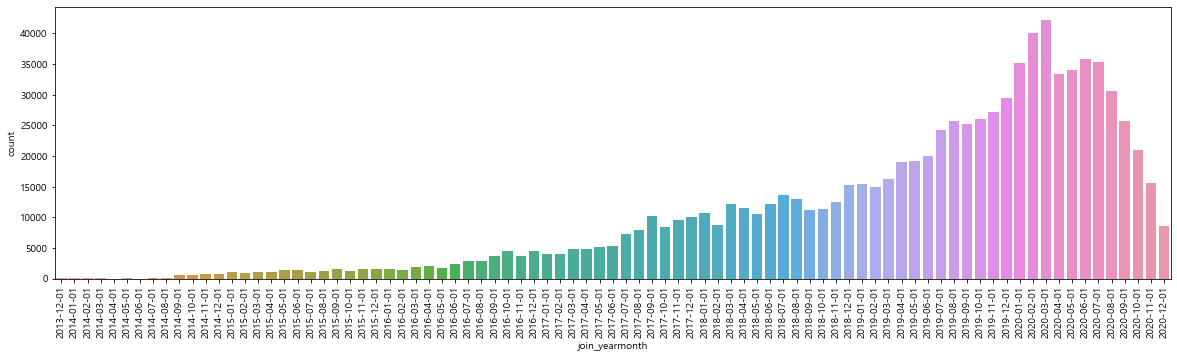

In [104]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation = 90)

sns.barplot(x = df_yearmonth['join_yearmonth'], y = df_yearmonth['count'])

In [105]:
df.dtypes

user_id                   object
join_date         datetime64[ns]
d_type                    object
store_id                  object
goods_type                object
date              datetime64[ns]
count                      int64
ad1                       object
join_yearmonth            object
join_year                 object
pay_yearmonth             object
pay_dow                   object
dtype: object

In [106]:
# 2020년은 윤년 days = 366
df['day_weight'] = (6.5 / 366) * df['join_date'].dt.dayofyear.astype(int)

In [107]:
from datetime import datetime
df2 = df.groupby(['join_year', 'user_id'])['count'].sum().reset_index()
df2.rename(columns = {"count": "total_count"}, inplace = True)
df_final = pd.merge(df, df2, left_on = 'user_id', right_on = 'user_id', how='inner')

df_final['real_count'] = df_final['count'] + ((6.5 / 366) * df_final['join_date'].dt.dayofyear.astype(int))/df_final['total_count']


In [134]:
df_final.loc[:528339, 'real_count'] = df['count']

In [136]:
df_final.head(20)

,user_id,join_date,d_type,store_id,goods_type,date,count,ad1,join_yearmonth,join_year_x,pay_yearmonth,pay_dow,day_weight,join_year_y,total_count,real_count
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2014-1,2014,2020-1,Wednesday,0.124317,2014,1,1.0
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2014-2,2014,2020-1,Wednesday,0.799180,2014,2,1.0
2,5647,2014-02-14,BB,91417,B,2020-02-10,1,SD,2014-2,2014,2020-2,Monday,0.799180,2014,2,1.0
3,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2014-11,2014,2020-1,Wednesday,5.754098,2014,3,1.0
4,33314,2014-11-20,BB,220077,C,2020-05-01,1,JRR,2014-11,2014,2020-5,Friday,5.754098,2014,3,1.0
5,33314,2014-11-20,BB,220914,A,2020-05-03,1,GS,2014-11,2014,2020-5,Sunday,5.754098,2014,3,1.0
6,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2014-12,2014,2020-1,Wednesday,6.002732,2014,33,1.0
7,37001,2014-12-04,BB,190223,A,2020-01-11,2,CY,2014-12,2014,2020-1,Saturday,6.002732,2014,33,1.0
8,37001,2014-12-04,BB,28018,B,2020-01-17,1,JRR,2014-12,2014,2020-1,Friday,6.002732,2014,33,1.0
9,37001,2014-12-04,BB,220557,A,2020-01-26,1,YO,2014-12,2014,2020-1,Sunday,6.002732,2014,33,1.0


<AxesSubplot:xlabel='join_yearmonth', ylabel='real_count'>

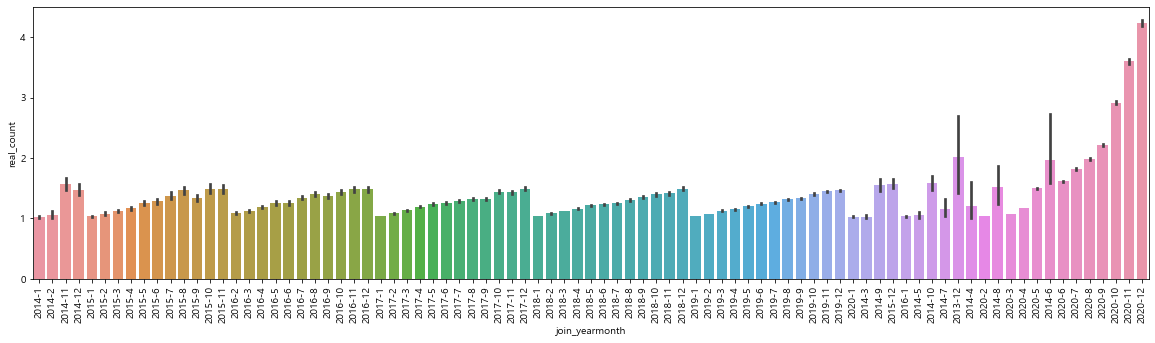

In [109]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation = 90)
sns.barplot(x = df_final['join_yearmonth'], y = df_final['real_count'])

<AxesSubplot:xlabel='join_yearmonth', ylabel='average_count'>

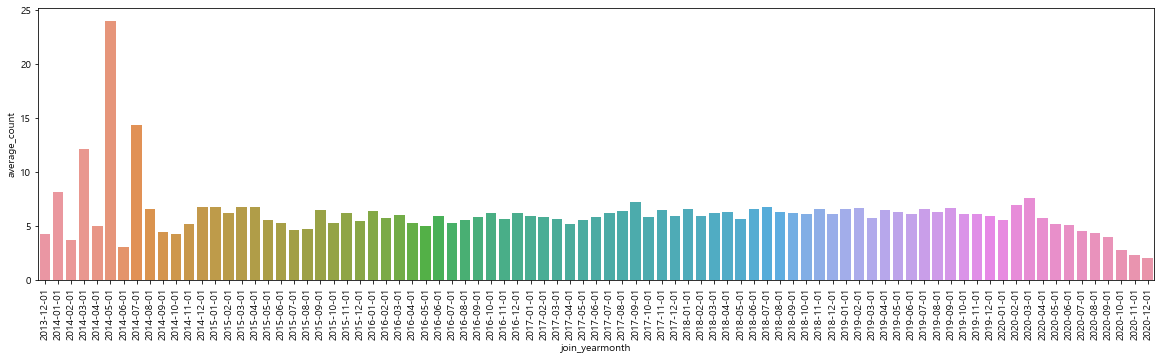

In [110]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
sns.barplot(x = df_yearmonth['join_yearmonth'], y = df_yearmonth['average_count'])

<AxesSubplot:xlabel='join_yearmonth', ylabel='average_count'>

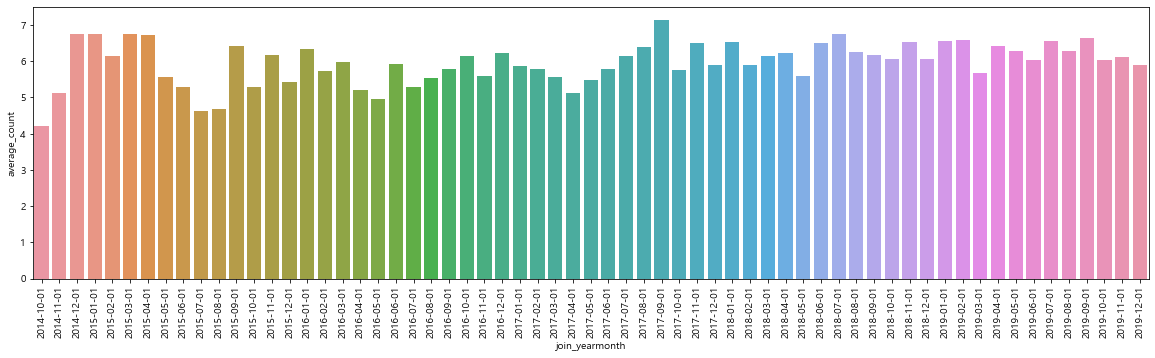

In [111]:
df_new_yearmonth = df_yearmonth.iloc[10:73]
plt.figure(figsize = (20, 5))
plt.xticks(rotation = 90)
sns.barplot(x = df_new_yearmonth['join_yearmonth'], y = df_new_yearmonth['average_count'])

### 따라서 인당 평균 결제수는 

따라서 가중치 계산
 1. join_date가 2020년 이후인 데이터
 2.  weight x (366 / 해당날짜 유저수)
 weight 

In [112]:
##평균 df_new_year['average_count'].mean()으로 하면X 가입자 수는 2013부터 증가하기때문에 동등한 가중치로 볼 수 없기 때문

df= df.sort_values(by='join_date')
weight = df.query('join_date < datetime(2020, 1, 1)')['count'].sum()  / df.query('join_date < datetime(2020, 1, 1)')['user_id'].nunique()
weight

6.145081742624897

### 2014-4월에 가입한 사람들의 평균 결제량이 제일 높았다.

1. 어플의 가입자가 시간이 지날수록 급격하게 늘어난다.
2. 문에 가입일자가 멀어질수록 평균 결제량의 분포가 커진다.
3. 그럼에도 살펴본다.


In [113]:
df.astype({'join_yearmonth':'str'}).dtypes
df.dtypes

user_id                   object
join_date         datetime64[ns]
d_type                    object
store_id                  object
goods_type                object
date              datetime64[ns]
count                      int64
ad1                       object
join_yearmonth            object
join_year                 object
pay_yearmonth             object
pay_dow                   object
day_weight               float64
dtype: object

In [114]:
##한번이라도 결재한 사람의 재결재 비율 (2020년)

df_user = df.groupby('user_id')['count'].sum().reset_index()
df_user


,user_id,count
0,224,2
1,232,24
2,342,1
3,565,2
4,729,1
...,...,...
165155,1830551,1
165156,1830570,1
165157,1830580,1
165158,1830589,1


In [115]:
##한번 이상 결재한 사람의 재결재 비율 (2020년)

pay_more_than_2 = df_user.query('count > 1')['user_id'].count() / df_user.query('count >= 1')['user_id'].count()
pay_more_than_2

0.5532090094453863

In [116]:
##두번 이상 결재한 사람의 재결재 비율 (2020년)

pay_more_than_2 = df_user.query('count > 2')['user_id'].count() / df_user.query('count >= 2')['user_id'].count()
pay_more_than_2

0.7067572892040977

In [117]:
##함수로 만들어서 적용

def pay_again_rate(column, count):
    
    pay_rate = df_user.query(f'count > {count}')[f'{column}'].count() / df_user.query(f'count >= {count}')[f'{column}'].count()
    
    return pay_rate

<BarContainer object of 49 artists>

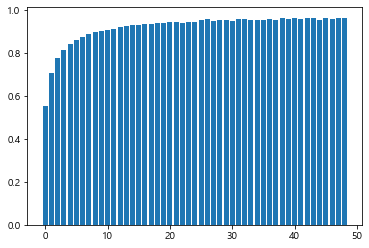

In [118]:
pay_again_list = []

for i in range(1, 50):
    
    pay_again_list.append(pay_again_rate('user_id', i))
    
pay_again_list

plt.bar(np.arange(len(pay_again_list)), pay_again_list)

In [119]:
### 2013-12 ~ 2020 - 12 결제 횟수 합산

df_join_yearmonth = df.groupby('join_yearmonth')['count'].sum().reset_index()

df_join_yearmonth.sort_values(by='join_yearmonth')
df_join_yearmonth['total_count'] = df_join_yearmonth['count'].cumsum()
df_join_yearmonth.tail(10)

,join_yearmonth,count,total_count
75,2020-11,15639,610079
76,2020-12,8506,618585
77,2020-2,40083,658668
78,2020-3,42247,700915
79,2020-4,33337,734252
80,2020-5,34079,768331
81,2020-6,35782,804113
82,2020-7,35300,839413
83,2020-8,30689,870102
84,2020-9,25699,895801


Text(0.5, 1.0, 'total_count')

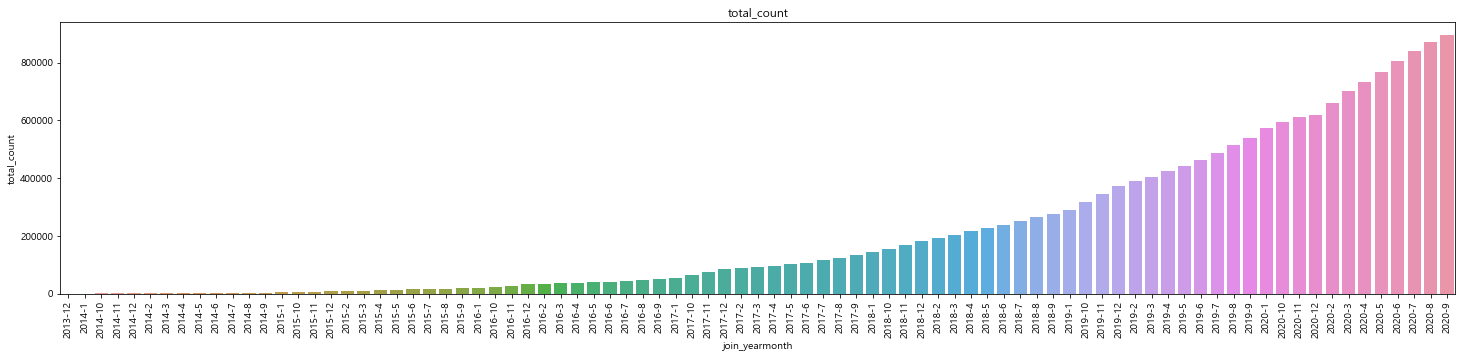

In [120]:
plt.figure(figsize = (25, 5))
plt.xticks(rotation = 90)
sns.barplot(x = df_join_yearmonth['join_yearmonth'], y = df_join_yearmonth['total_count'])
plt.title('total_count')

In [121]:
df_ym = df.groupby('join_yearmonth')['count', 'user_id'].agg({'count' : 'sum', 'user_id' : 'nunique'}).reset_index()
df_ym

<ipython-input-121-f3ea7fadedf0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ym = df.groupby('join_yearmonth')['count', 'user_id'].agg({'count' : 'sum', 'user_id' : 'nunique'}).reset_index()


,join_yearmonth,count,user_id
0,2013-12,38,9
1,2014-1,113,14
2,2014-10,500,119
3,2014-11,682,133
4,2014-12,791,117
...,...,...,...
80,2020-5,34079,6621
81,2020-6,35782,7036
82,2020-7,35300,7858
83,2020-8,30689,7113


### 년도별 loyalty 지수

가입자 join_yearmonth별 인당 평균 몇회 결제를 했는지 탐색 

In [122]:
df_ym['count'][0]/df_ym['user_id'][0]

4.222222222222222

In [123]:
df_ym['count'][1]/df_ym['user_id'][1]

8.071428571428571

In [124]:
#df_ym에 loyalty 지수 추가
df_ym['loyalty'] = df_ym['count']/df_ym['user_id']
df_ym.dtypes

join_yearmonth     object
count               int64
user_id             int64
loyalty           float64
dtype: object

In [125]:

df_ym['join_yearmonth'] = df_ym['join_yearmonth'].apply(lambda X : pd.to_datetime(X))
df_y = df_ym.groupby(df_ym['join_yearmonth'].dt.year.astype(str)).mean().reset_index()
df_y.rename(columns ={'join_yearmonth' : 'join_year'}, inplace=True)
df_y = df_y.iloc[:7]
df_y


,join_year,count,user_id,loyalty
0,2013,38.000000,9.000000,4.222222
1,2014,250.250000,45.750000,8.101288
2,2015,1273.666667,223.250000,5.816609
3,2016,2774.583333,483.000000,5.723990
4,2017,6779.666667,1125.000000,5.954086
5,2018,11899.250000,1911.250000,6.224502
6,2019,21874.416667,3510.333333,6.258804


<AxesSubplot:xlabel='join_year', ylabel='loyalty'>

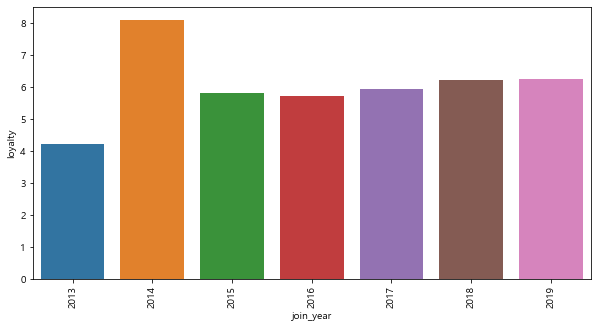

In [126]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 90)
df_y.astype({'join_year':'float'}).dtypes

sns.barplot(x = df_y['join_year'], y = df_y['loyalty'])

## 머신 러닝

### Random Forest 돌려보기

In [127]:
features = df
features.head(3)
features = features.loc[:, 'user_id':'ad1']
#df['join_yearmonth'] = df['join_date'].dt.year.astype(str) + '-' +df['join_date'].dt.month.astype(str)
features['join_year'] = features['join_date'].dt.year.astype(str)
features['join_month'] = features['join_date'].dt.month.astype(str)
features['join_day'] = features['join_date'].dt.day.astype(str)

features['date_year'] = features['date'].dt.year.astype(str)
features['date_month'] = features['date'].dt.month.astype(str)
features['date_day'] = features['date'].dt.day.astype(str)

features.drop('join_date', axis=1, inplace=True)
features.drop('date', axis=1, inplace=True)

In [128]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(features['d_type'])
features['d_type'] = le.transform(features['d_type'])


In [129]:
le.fit(features['goods_type'])
features['goods_type'] = le.transform(features['goods_type'])

le.fit(features['ad1'])
features['ad1'] = le.transform(features['ad1'])

In [130]:
features

,user_id,d_type,store_id,goods_type,count,ad1,join_year,join_month,join_day,date_year,date_month,date_day
821958,224,0,181833,2,1,49,2013,12,16,2020,12,9
18802,224,0,92510,0,1,49,2013,12,16,2020,1,12
253730,232,1,28018,2,1,51,2013,12,17,2020,5,10
233587,232,1,109555,2,1,37,2013,12,17,2020,4,30
694997,232,1,173268,0,1,49,2013,12,17,2020,10,27
...,...,...,...,...,...,...,...,...,...,...,...,...
879214,1829871,0,223058,1,1,4,2020,12,31,2020,12,31
879213,1829862,0,109877,2,1,39,2020,12,31,2020,12,31
879212,1829858,0,173268,0,1,49,2020,12,31,2020,12,31
879230,1829959,1,230814,0,1,52,2020,12,31,2020,12,31


In [131]:
import numpy as np

labels = np.array(features['count'])

features = features.drop('count', axis = 1)

feature_list = list(features.columns)

features = np.array(features)

In [132]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [133]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (658359, 11)
Training Labels Shape: (658359,)
Testing Features Shape: (219453, 11)
Testing Labels Shape: (219453,)
